In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7486 - loss: 0.6959 - val_accuracy: 0.8637 - val_loss: 0.3813
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8803 - loss: 0.3340 - val_accuracy: 0.8862 - val_loss: 0.3103
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8952 - loss: 0.2878 - val_accuracy: 0.8919 - val_loss: 0.2901
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9095 - loss: 0.2489 - val_accuracy: 0.8961 - val_loss: 0.2886
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9165 - loss: 0.2271 - val_accuracy: 0.9081 - val_loss: 0.2602
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9266 - loss: 0.1983 - val_accuracy: 0.9109 - val_loss: 0.2451
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9336 - loss: 0.1814 - val_accuracy: 0.9112 - val_loss: 0.2547
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9429 - los

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy : {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9084 - loss: 0.2871

Test Accuracy : 90.68%


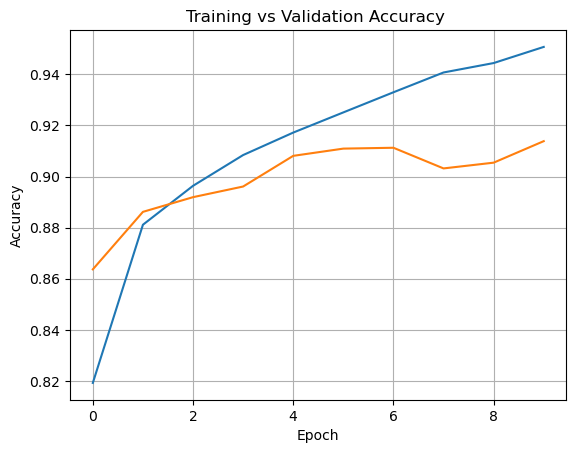

In [15]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Training vs Validation Accuracy ")
plt.grid()
plt.show()